## Pumpkin Varieties and Color

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

Let's look at the relationship between color and variety

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv('../data/300behavior.csv')

pumpkins.head()


,ID,Date,Trial#,Lever,NextLever,WSLS,LeverZmax,LeverZmin,LeverAUC,HLZmax,HLZmin,HLAUC
0,16,230123,1,3,3,1,1.292871,-1.619110,-39.404888,0.388813,-1.497714,-75.713964
1,16,230123,2,3,3,1,-0.117232,-2.981589,-154.557564,0.854429,-1.816165,-80.799713
2,16,230123,3,3,3,1,3.017644,-1.618499,29.305127,1.422176,-1.679342,-28.084397
3,16,230123,4,3,3,1,2.978331,-1.727743,-11.977367,3.453042,-1.292361,95.478958
4,16,230123,5,3,3,1,-0.852874,-3.262844,-173.243294,-0.331012,-1.374687,-68.738582


In [3]:
columns_to_select = ['Trial#', 'Lever', 'NextLever', 'WSLS', 'LeverZmax', 'LeverZmin', 'LeverAUC', 'HLZmax', 'HLZmin', 'HLAUC']
new_pumpkins = pumpkins.loc[:, columns_to_select]

new_pumpkins.head()


,Trial#,Lever,NextLever,WSLS,LeverZmax,LeverZmin,LeverAUC,HLZmax,HLZmin,HLAUC
0,1,3,3,1,1.292871,-1.619110,-39.404888,0.388813,-1.497714,-75.713964
1,2,3,3,1,-0.117232,-2.981589,-154.557564,0.854429,-1.816165,-80.799713
2,3,3,3,1,3.017644,-1.618499,29.305127,1.422176,-1.679342,-28.084397
3,4,3,3,1,2.978331,-1.727743,-11.977367,3.453042,-1.292361,95.478958
4,5,3,3,1,-0.852874,-3.262844,-173.243294,-0.331012,-1.374687,-68.738582


In [4]:
new_pumpkins.info


<bound method DataFrame.info of       Trial#  Lever  NextLever  WSLS  LeverZmax  LeverZmin    LeverAUC  \
0          1      3          3     1   1.292871  -1.619110  -39.404888   
1          2      3          3     1  -0.117232  -2.981589 -154.557564   
2          3      3          3     1   3.017644  -1.618499   29.305127   
3          4      3          3     1   2.978331  -1.727743  -11.977367   
4          5      3          3     1  -0.852874  -3.262844 -173.243294   
...      ...    ...        ...   ...        ...        ...         ...   
1672      51      3          1     3   3.332265  -1.602789  115.062938   
1673      52      1          0     0   4.506867  -2.054242  145.104620   
1674      55      1          2     0   0.637471  -3.201188 -152.723927   
1675      56      2          0     2   2.911747  -0.353442  142.243917   
1676      59      1          0     0   1.568098  -1.403199   -1.866457   

        HLZmax    HLZmin       HLAUC  
0     0.388813 -1.497714  -75.713964  
1

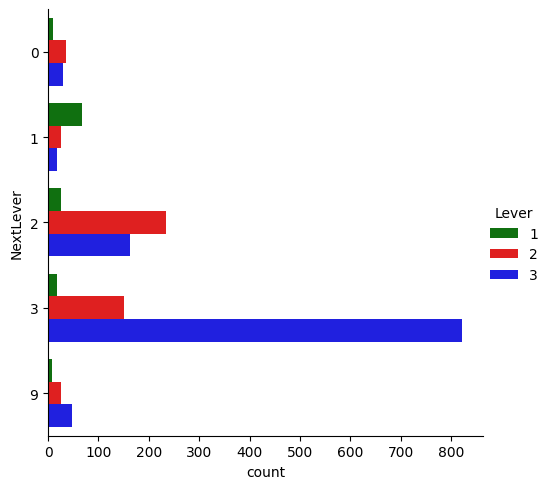

In [20]:
palette = {
    1: 'green',
    2: 'red',
    3: 'blue'
}

sns.catplot(
data=new_pumpkins, y="NextLever", hue="Lever", kind="count",
palette=palette,
)

In [6]:
pip install -U scikit-learn



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\wonnp\AppData\Local\Temp\ipykernel_26288\848516191.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


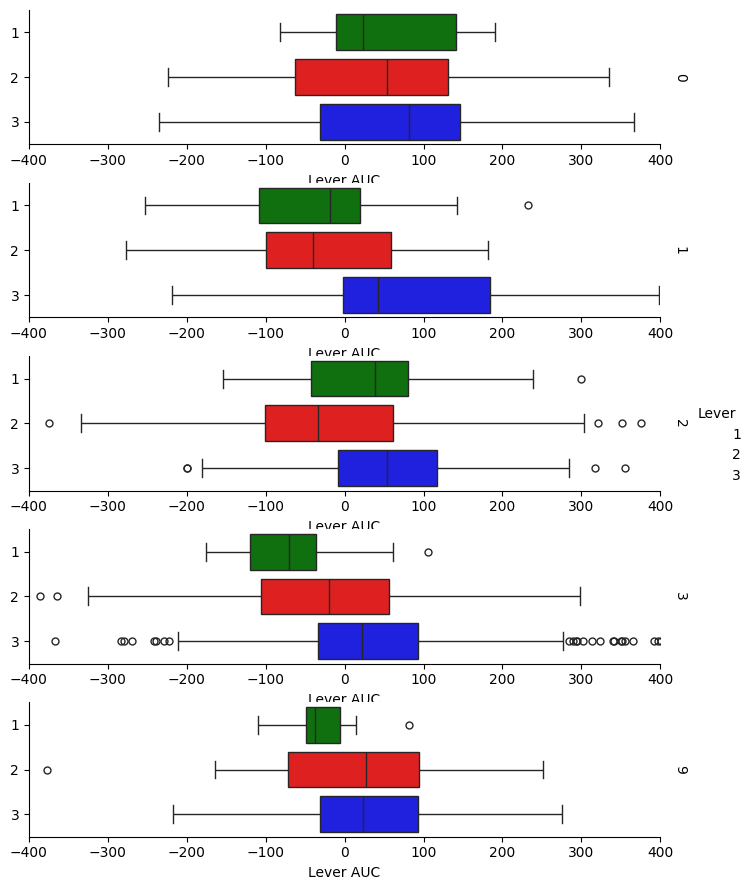

In [13]:
import seaborn as sns
palette = {
'1': 'green',
'2': 'red',
'3': 'blue'
}
pumpkins['LeverAUC'] = new_pumpkins['LeverAUC']

g = sns.catplot(
    data=pumpkins,
    x="LeverAUC", y="Lever", row='NextLever',
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.8, aspect=4, palette=palette,
)
g.set(xlabel="Lever AUC", ylabel="").set(xlim=(-400,400))
g.set_titles(row_template="{row_name}")

In [23]:
new_pumpkins.head
col_pumpkins = ['Lever', 'NextLever', 'LeverAUC', 'HLAUC']

model_pumpkins = pumpkins[col_pumpkins]
model_pumpkins.head

<bound method NDFrame.head of       Lever  NextLever    LeverAUC       HLAUC
0         3          3  -39.404888  -75.713964
1         3          3 -154.557564  -80.799713
2         3          3   29.305127  -28.084397
3         3          3  -11.977367   95.478958
4         3          3 -173.243294  -68.738582
...     ...        ...         ...         ...
1672      3          1  115.062938  -11.777912
1673      1          0  145.104620  426.061993
1674      1          2 -152.723927   88.204134
1675      2          0  142.243917  105.039027
1676      1          0   -1.866457  117.981146

[1677 rows x 4 columns]>

In [24]:
from sklearn.model_selection import train_test_split

X = model_pumpkins[model_pumpkins.columns.difference(['NextLever'])]
y = model_pumpkins['NextLever']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [28]:
from sklearn.metrics import f1_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('F1-score: ', f1_score(y_test, predictions, average='weighted'))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        16
           2       0.44      0.55      0.49        84
           3       0.78      0.85      0.81       211
           9       0.00      0.00      0.00        12

    accuracy                           0.67       336
   macro avg       0.24      0.28      0.26       336
weighted avg       0.60      0.67      0.63       336

Predicted labels:  [3 3 2 2 3 3 2 3 3 3 3 3 3 3 3 3 2 3 3 2 3 3 3 3 3 3 2 3 2 3 2 2 2 3 3 3 2
 2 3 2 3 2 3 3 3 2 3 2 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 3 3 2 3 3 3 2 2 3 3 2
 2 3 3 3 3 3 2 3 3 3 3 3 2 3 2 2 3 3 3 3 3 3 2 3 3 3 3 3 2 3 3 2 3 2 3 3 2
 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 3 3 2 2 3 2 3 3 2 3 3 3 3 3 2 3
 2 3 2 2 2 2 3 3 2 2 3 2 2 2 2 3 2 2 3 3 3 3 3 2 2 3 2 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 2 3 3 3 2 3 3 3 3 3 2 3 2 3 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2
 3 3 3 3 3 3 2 3 2 2 2 2 3 3 2 3 3 3 2 3 3

c:\Users\wonnp\Documents\GitHub\ML-For-Beginners\.virtualenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\wonnp\Documents\GitHub\ML-For-Beginners\.virtualenv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\wonnp\Documents\GitHub\ML-For-Beginners\.virtualenv\Lib\site-packages\sklearn\metrics\_cla

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[  0,   0,   9,   4,   0],
       [  0,   0,  14,   2,   0],
       [  0,   0,  46,  38,   0],
       [  0,   0,  31, 180,   0],
       [  0,   0,   5,   7,   0]], dtype=int64)

In Scikit-learn, confusion matrices Rows (axis 0) are actual labels and columns (axis 1) are predicted labels.

    0	1
0	TN	FP
1	FN	TP

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

ValueError: multiclass format is not supported

In [28]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.9749908725812341
